# CSE 574 - Introduction to Machine Learning - PROJECT 1

#Submitted by: Vishva Nitin Patel
#UB Person Number: 50318625
#Email ID: vishvani@buffalo.edu

In [17]:
#All the imports required
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix

# 1. Extracting features values and Image Ids from the data:

In [18]:
cancer_data = pd.read_csv("wdbc.dataset",header = None) #Data Set
cancer_data.columns = ['id','diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave.points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave.points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave.points_worst','symmetry_worst','fractal_dimension_worst']

#Setting Benign=0 and Malignant=1 in the cancer_data Dataframe
cancer_data['diagnosis']=cancer_data['diagnosis'].map({'B':0,'M':1})

X = cancer_data.iloc[:,2:32].values #Feature Data
Y = cancer_data.iloc[:,1].values #Classification Data

#Normalizing X values
X_norm = np.linalg.norm(X,axis=1,keepdims=True)
X=X/X_norm

# 2. Data Partitioning: (Training,Testing and Validation Data)

In [19]:
cancer_data = shuffle(cancer_data) #Randomizing the data
cancer_data.reset_index(drop=True)
X_train, X_test, X_validate  = np.split(X, [int(.8*len(X)), int(.9*len(X))])
Y_train, Y_test, Y_validate  = np.split(Y, [int(.8*len(Y)), int(.9*len(Y))])

# 3. Train using Logistic Regression:

In [20]:
#Transforming values for computation
X_train,Y_train=X_train.T,Y_train.reshape(1,Y_train.shape[0])
X_test,Y_test=X_test.T,Y_test.reshape(1,Y_test.shape[0])
X_validate,Y_validate=X_validate.T,Y_validate.reshape(1,Y_validate.shape[0])

def sigmoid(z): #Sigmoid Function
    return 1 / (1 + np.exp(-z))

def func2_regresses(X_value_matrix,epochs,learningrate):
    global w,b, losstrack   
    losstrack = [] #Tracking the way the cost function drops in value
    m = X_train.shape[1] #Number of Training instances
    w = np.random.randn(X_train.shape[0], 1)*0.01 #Weight
    b = 0 #Bias
    
    for epoch in range(epochs):
        z = np.dot(w.T, X_train) + b
        p = sigmoid(z) 
        cost = -np.sum(np.multiply(np.log(p), Y_train) + np.multiply((1 - Y_train), np.log(1 - p)))/m
        losstrack.append(cost)
        dz = p-Y_train
        dw = (1 / m) * np.dot(X_train, dz.T)
        db = (1 / m) * np.sum(dz)
        w = w - learningrate * dw
        b = b - learningrate * db

def func1_predicts(X_value_matrix):
    z = np.dot(w.T, X_value_matrix) + b
    p = sigmoid(z) 
    p_new = (p>0.5).astype(int)
    return p_new

func2_regresses(X_train,epochs = 20000,learningrate=0.1)

predicted_Y_train=(func1_predicts(X_train))#Training
predicted_Y_validate=(func1_predicts(X_validate))#Predicting
predicted_Y_test=(func1_predicts(X_test))#Predicting

In [21]:
#Without tuning Hyper-Parameters:
print("Without hyper-tuning the parameters (Iterations and Learning Rate):")
print("\nepoch = 20000 and learningrate = 0.1")
print("\nConfusion Matrix - Training data set\n")
print(confusion_matrix(Y_train[0], predicted_Y_train[0]))

con_mat = confusion_matrix(Y_train[0], predicted_Y_train[0])
Train_Accuracy = (con_mat[0,0] + con_mat[1,1]) / (con_mat[0,0]+con_mat[0,1]+con_mat[1,0]+con_mat[1,1])
print("\nTrain_Accuracy = ", Train_Accuracy)
Train_Precision = con_mat[0,0] / (con_mat[0,0] + con_mat[0,1])
print("\nTrain_Precision = ", Train_Precision)
Train_Recall = con_mat[0,0] / (con_mat[0,0] + con_mat[1,0])
print("\nTrain_Recall = ", Train_Recall)

#Classification Report gives complete insight for hyper-parameter tuning
print("\nClassification Report - Training data set\n")
print(classification_report(Y_train[0], predicted_Y_train[0]))
print("\n")


print("\nConfusion Matrix - Validation data set\n")
print(confusion_matrix(Y_validate[0], predicted_Y_validate[0]))

con_mat = confusion_matrix(Y_validate[0], predicted_Y_validate[0])
Validate_Accuracy = (con_mat[0,0] + con_mat[1,1]) / (con_mat[0,0]+con_mat[0,1]+con_mat[1,0]+con_mat[1,1])
print("\nValidate_Accuracy = ", Validate_Accuracy)
Validate_Precision = con_mat[0,0] / (con_mat[0,0] + con_mat[0,1])
print("\nValidate_Precision = ", Validate_Precision)
Validate_Recall = con_mat[0,0] / (con_mat[0,0] + con_mat[1,0])
print("\nValidate_Recall = ", Validate_Recall)

#Classification Report gives complete insight for hyper-parameter tuning
print("\nClassification Report - Validation data set\n")
print(classification_report(Y_validate[0], predicted_Y_validate[0]))
print("\n")

Without hyper-tuning the parameters (Iterations and Learning Rate):

epoch = 20000 and learningrate = 0.1

Confusion Matrix - Training data set

[[262   7]
 [ 39 147]]

Train_Accuracy =  0.8989010989010989

Train_Precision =  0.9739776951672863

Train_Recall =  0.8704318936877077

Classification Report - Training data set

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       269
           1       0.95      0.79      0.86       186

   micro avg       0.90      0.90      0.90       455
   macro avg       0.91      0.88      0.89       455
weighted avg       0.90      0.90      0.90       455




Confusion Matrix - Validation data set

[[42  1]
 [ 2 12]]

Validate_Accuracy =  0.9473684210526315

Validate_Precision =  0.9767441860465116

Validate_Recall =  0.9545454545454546

Classification Report - Validation data set

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
         


epochs = 20000 and learningrate=0.1


Text(0, 0.5, 'Cost')

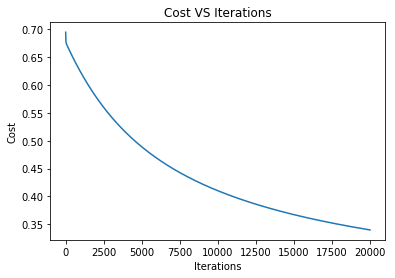

In [22]:
#Plotting the drop in the Cost Function
print("\nepochs = 20000 and learningrate=0.1")
plt.plot(losstrack)
plt.title('Cost VS Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')

# 4. Tuning Hyper-Parameters:


__________________________________________________________________________________________________________

epochs =  35000 & learningrate =  0.05

Confusion Matrix - Training data set

[[263   6]
 [ 40 146]]

Train_Accuracy =  0.8989010989010989

Train_Precision =  0.9776951672862454

Train_Recall =  0.8679867986798679

Classification Report - Training data set

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       269
           1       0.96      0.78      0.86       186

   micro avg       0.90      0.90      0.90       455
   macro avg       0.91      0.88      0.89       455
weighted avg       0.91      0.90      0.90       455




Confusion Matrix - Validation data set

[[42  1]
 [ 2 12]]

Validate_Accuracy =  0.9473684210526315

Validate_Precision =  0.9767441860465116

Validate_Recall =  0.9545454545454546

Classification Report - Validation data set

              precision    recall  f1-score   support

           0       0.

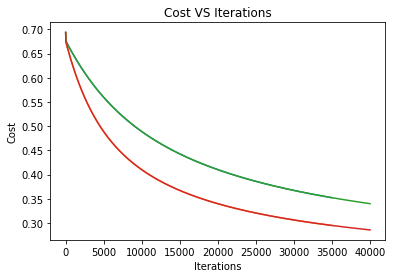

In [23]:
#We will tune --> Learning Rate and epochs(i.e. Iterations) to get best results in 'Validation' set.
new_epoch = [35000,40000]
new_learningrate = [0.05,0.1]

for i in new_epoch:
    for j in new_learningrate:
        func2_regresses(X_train,i,j) #Regressing X_Train (i.e. our training data)
        predicted_Y_train=(func1_predicts(X_train))
        predicted_Y_validate=(func1_predicts(X_validate))
        
        print("\n__________________________________________________________________________________________________________\n")
        print("epochs = ", i , "& learningrate = ", j)
        con_mat = confusion_matrix(Y_train[0], predicted_Y_train[0])
        print("\nConfusion Matrix - Training data set\n")
        print(con_mat)
        Train_Accuracy = (con_mat[0,0] + con_mat[1,1]) / (con_mat[0,0]+con_mat[0,1]+con_mat[1,0]+con_mat[1,1])
        print("\nTrain_Accuracy = ", Train_Accuracy)
        Train_Precision = con_mat[0,0] / (con_mat[0,0] + con_mat[0,1])
        print("\nTrain_Precision = ", Train_Precision)
        Train_Recall = con_mat[0,0] / (con_mat[0,0] + con_mat[1,0])
        print("\nTrain_Recall = ", Train_Recall)
        #Classification Report gives complete insight for hyper-parameter tuning
        print("\nClassification Report - Training data set\n")
        print(classification_report(Y_train[0], predicted_Y_train[0]))
        print("\n")
        
        con_mat = confusion_matrix(Y_validate[0], predicted_Y_validate[0])
        print("\nConfusion Matrix - Validation data set\n")
        print(con_mat)
        Validate_Accuracy = (con_mat[0,0] + con_mat[1,1]) / (con_mat[0,0]+con_mat[0,1]+con_mat[1,0]+con_mat[1,1])
        print("\nValidate_Accuracy = ", Validate_Accuracy)
        Validate_Precision = con_mat[0,0] / (con_mat[0,0] + con_mat[0,1])
        print("\nValidate_Precision = ", Validate_Precision)
        Validate_Recall = con_mat[0,0] / (con_mat[0,0] + con_mat[1,0])
        print("\nValidate_Recall = ", Validate_Recall)
  
        #Classification Report gives complete insight for hyper-parameter tuning
        print("\nClassification Report - Validation data set\n")
        print(classification_report(Y_validate[0], predicted_Y_validate[0]))     
        print("\n__________________________________________________________________________________________________________\n")

        plt.plot(losstrack)
        plt.title('Cost VS Iterations')
        plt.xlabel('Iterations')
        plt.ylabel('Cost')

# 5. Testing machine learning scheme on the testing set:

BEST CASE SCENARIO:

epochs = 40000 & learningrate = 0.1

Confusion Matrix - Training data set

[[261   8]
 [ 34 152]]

Train_Accuracy =  0.9076923076923077

Train_Precision =  0.9702602230483272

Train_Recall =  0.8847457627118644

Classification Report - Training data set

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       269
           1       0.95      0.82      0.88       186

   micro avg       0.91      0.91      0.91       455
   macro avg       0.92      0.89      0.90       455
weighted avg       0.91      0.91      0.91       455


Confusion Matrix - Testing Data set

[[42  3]
 [ 4  8]]

Test_Accuracy =  0.8771929824561403

Test_Precision =  0.9333333333333333

Test_Recall =  0.9130434782608695

Classification Report - Testing Data set

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        45
           1       0.73      0.67      0.70        12

   micro avg       0.88

Text(0, 0.5, 'Cost')

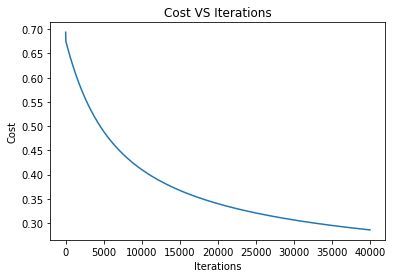

In [24]:
#taking the best number of iterations and learning rate
func2_regresses(X_train,epochs = 40000,learningrate=0.1)
predicted_Y_train=(func1_predicts(X_train))
predicted_Y_test=(func1_predicts(X_test))
print("BEST CASE SCENARIO:")
print("\nepochs = 40000 & learningrate = 0.1")

print("\nConfusion Matrix - Training data set\n")
con_mat = confusion_matrix(Y_train[0], predicted_Y_train[0])
print(con_mat)
Train_Accuracy = (con_mat[0,0] + con_mat[1,1]) / (con_mat[0,0]+con_mat[0,1]+con_mat[1,0]+con_mat[1,1])
print("\nTrain_Accuracy = ", Train_Accuracy)
Train_Precision = con_mat[0,0] / (con_mat[0,0] + con_mat[0,1])
print("\nTrain_Precision = ", Train_Precision)
Train_Recall = con_mat[0,0] / (con_mat[0,0] + con_mat[1,0])
print("\nTrain_Recall = ", Train_Recall)
print("\nClassification Report - Training data set\n")
print(classification_report(Y_train[0], predicted_Y_train[0]))

print("\nConfusion Matrix - Testing Data set\n")
con_mat = confusion_matrix(Y_test[0], predicted_Y_test[0])
print(con_mat)
Test_Accuracy = (con_mat[0,0] + con_mat[1,1]) / (con_mat[0,0]+con_mat[0,1]+con_mat[1,0]+con_mat[1,1])
print("\nTest_Accuracy = ", Test_Accuracy)
Test_Precision = con_mat[0,0] / (con_mat[0,0] + con_mat[0,1])
print("\nTest_Precision = ", Test_Precision)
Test_Recall = con_mat[0,0] / (con_mat[0,0] + con_mat[1,0])
print("\nTest_Recall = ", Test_Recall)
print("\nClassification Report - Testing Data set\n")
print(classification_report(Y_test[0], predicted_Y_test[0]))

print("\nConfusion Matrix - Validation data set\n")
con_mat = confusion_matrix(Y_validate[0], predicted_Y_validate[0])
print(con_mat)
Validate_Accuracy = (con_mat[0,0] + con_mat[1,1]) / (con_mat[0,0]+con_mat[0,1]+con_mat[1,0]+con_mat[1,1])
print("\nValidate_Accuracy = ", Validate_Accuracy)
Validate_Precision = con_mat[0,0] / (con_mat[0,0] + con_mat[0,1])
print("\nValidate_Precision = ", Validate_Precision)
Validate_Recall = con_mat[0,0] / (con_mat[0,0] + con_mat[1,0])
print("\nValidate_Recall = ", Validate_Recall)
print("\nClassification Report - Validation data set\n")
print(classification_report(Y_validate[0], predicted_Y_validate[0]))


plt.plot(losstrack)
plt.title('Cost VS Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')